In [13]:
import pandas as pd
import numpy as np
import json
import glob
from geopy.distance import vincenty as distance
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

sns.set_context('notebook', font_scale=1.6)
%matplotlib inline

# Goals

1. Introduce concept of chained operations
2. Best methods in chained operations:
    * query
    * assign
    * pipe

# Load the data

In [20]:
def load_divvy_data():
    # load trip data from multiple csv files
    dfs = []
    for fn in glob.iglob('divvy_data/Divvy_Trips*.csv'):
        dfs.append(pd.read_csv(fn))
    trips = pd.concat(dfs)
    
    # load stations from csv
    stations = pd.read_csv('divvy_data/Divvy_Stations_2016_Q1Q2.csv')
    return df

def load_station_data():
    df = pd.read_csv('divvy_data/Divvy_Stations_2016_Q1Q2.csv')
    return df


trips = load_divvy_data()
stations = load_station_data()

print trips.info()
display(trips.head())

print '\n\n', stations.info()
display(stations.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231635 entries, 0 to 231634
Data columns (total 12 columns):
trip_id              231635 non-null int64
starttime            231635 non-null datetime64[ns]
stoptime             231635 non-null object
bikeid               231635 non-null int64
tripduration         231635 non-null int64
from_station_id      231635 non-null int64
from_station_name    231635 non-null object
to_station_id        231635 non-null int64
to_station_name      231635 non-null object
usertype             231635 non-null object
gender               182217 non-null object
birthyear            182243 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 21.2+ MB
None


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,9379901,2016-04-30 23:59:00,5/1/2016 0:11,21,733,123,California Ave & Milwaukee Ave,374,Western Ave & Walton St,Subscriber,Male,1982.0
1,9379900,2016-04-30 23:58:00,5/1/2016 0:07,3583,556,349,Halsted St & Wrightwood Ave,165,Clark St & Grace St,Subscriber,Male,1991.0
2,9379899,2016-04-30 23:58:00,5/1/2016 0:02,4557,253,59,Wabash Ave & Roosevelt Rd,273,Michigan Ave & 18th St,Subscriber,Male,1984.0
3,9379898,2016-04-30 23:54:00,5/1/2016 0:08,2443,802,289,Wells St & Concord Ln,199,Wabash Ave & Grand Ave,Subscriber,Male,1978.0
4,9379897,2016-04-30 23:52:00,5/1/2016 0:11,50,1146,239,Western Ave & Leland Ave,227,Southport Ave & Waveland Ave,Customer,NaN,NaN




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 6 columns):
id             535 non-null int64
name           535 non-null object
latitude       535 non-null float64
longitude      535 non-null float64
dpcapacity     535 non-null int64
online_date    535 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 25.1+ KB
None


,id,name,latitude,longitude,dpcapacity,online_date
0,456,2112 W Peterson Ave,41.991178,-87.683593,15,5/12/2015
1,101,63rd St Beach,41.781016,-87.576120,23,4/20/2015
2,109,900 W Harrison St,41.874675,-87.650019,19,8/6/2013
3,21,Aberdeen St & Jackson Blvd,41.877726,-87.654787,15,6/21/2013
4,80,Aberdeen St & Monroe St,41.880456,-87.653929,19,6/26/2013


# What is Operation Chaining???

Applying multiple methods of the pandas class in a linear fashion. Let's begin by cutting our customer base by age, and seeing which segments use divvy the most:
1. First Find Customer Age
2. Cut customers into bins based on age
3. Look at how many rides our customers took

Without operation chaining:

In [27]:
np.arange(15, 80, 5)

array([15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75])

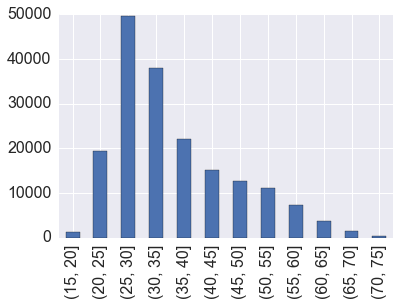

In [59]:
t = trips.copy()
t['age'] = 2016 - t['birthyear']
t['age_cut'] = pd.cut(t['age'], bins=np.arange(15, 80, 5))
t['age_cut'].value_counts().sort_index().plot(kind='bar')
plt.show()

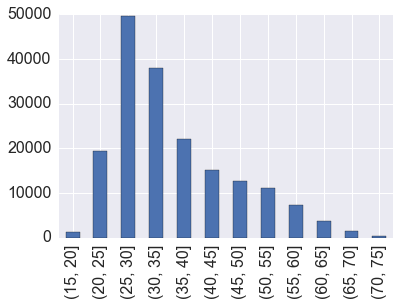

In [79]:
(
    trips
    .assign(age=lambda df: 2016 - df.birthyear)
    .assign(age_cut=lambda df: pd.cut(df.age, bins=np.arange(15, 80, 5)))
    .loc[:, 'age_cut']
    .value_counts()
    .sort_index()
).plot(kind='bar')

plt.show()

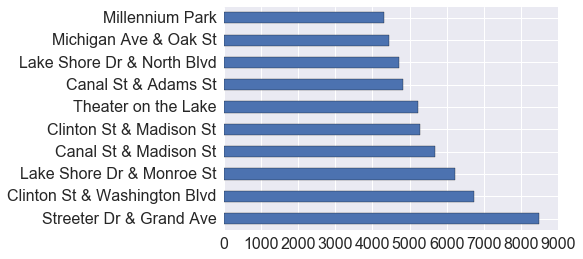

In [105]:
(
    trips
    .loc[:, ['from_station_name', 'to_station_name']]
    .stack()
    .value_counts()
    .head(10)
).plot(kind='barh')

plt.show()